In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
SRC_PATH = PROJECT_ROOT / "src"
sys.path.append(str(SRC_PATH))

import pandas as pd
import matplotlib.pyplot as plt

from cycle_tda.io import load_csv

xau_path = PROJECT_ROOT / "data/raw/XAU_Monthly.csv"
xag_path = PROJECT_ROOT / "data/raw/XAG_Monthly.csv"

df_xau = load_csv(xau_path, date_col="Date", value_col="Close")
df_xag = load_csv(xag_path, date_col="Date", value_col="Close")

df_xau.head(), df_xag.head()



(        Date  Close
 0 1793-03-31  19.39
 1 1793-06-30  19.39
 2 1793-09-30  19.39
 3 1793-12-31  19.39
 4 1794-03-31  19.39,
         Date  Close
 0 1792-03-31   1.29
 1 1792-06-30   1.29
 2 1792-09-30   1.29
 3 1792-12-31   1.29
 4 1793-03-31   1.29)

In [2]:
print("XAU rows:", len(df_xau))
print("XAU date range:", df_xau["Date"].min(), "→", df_xau["Date"].max())

print("XAG rows:", len(df_xag))
print("XAG date range:", df_xag["Date"].min(), "→", df_xag["Date"].max())



XAU rows: 1396
XAU date range: 1793-03-31 00:00:00 → 2025-12-31 00:00:00
XAG rows: 1436
XAG date range: 1792-03-31 00:00:00 → 2025-12-31 00:00:00


In [3]:
def check_monthly(df):
    diffs = df["Date"].diff().dt.days.dropna()
    return diffs.describe()

check_monthly(df_xau), check_monthly(df_xag)



(count    1395.000000
 mean       60.939785
 std        30.457263
 min        28.000000
 25%        31.000000
 50%        90.000000
 75%        92.000000
 max        92.000000
 Name: Date, dtype: float64,
 count    1435.000000
 mean       59.495470
 std        30.423702
 min        28.000000
 25%        31.000000
 50%        31.000000
 75%        91.000000
 max        92.000000
 Name: Date, dtype: float64)

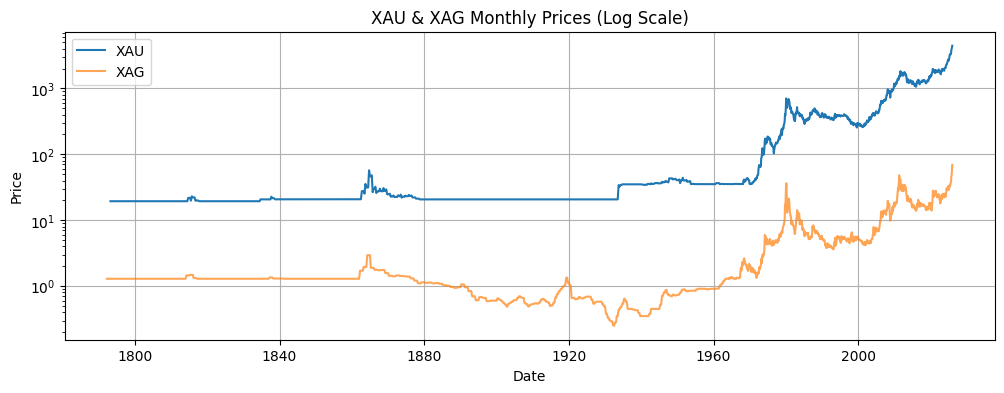

(Date     0
 Close    0
 dtype: int64,
 Date     0
 Close    0
 dtype: int64)

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(df_xau["Date"], df_xau["Close"], label="XAU")
plt.plot(df_xag["Date"], df_xag["Close"], label="XAG", alpha=0.7)
plt.yscale("log")
plt.title("XAU & XAG Monthly Prices (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

df_xau.isna().sum(), df_xag.isna().sum()
